In [6]:
from sklearn.datasets import fetch_california_housing # importa o conjunto de dados
import pandas as pd # para trabalhar com os dados
import numpy as np # para fazer cálculos

# Carregando o dataset

casas = fetch_california_housing()

casas

# Convertendo o dataset em dataframe (planilha)

casas_df = pd.DataFrame(casas.data, columns = casas.feature_names)
casas_df['MedianValue'] = casas.target

# mostrar as primeiras linhas

casas_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
# Existem valores faltantes?

print(casas_df.isnull().sum())
# Se houver valores numéricos faltantes substitui pela média e se não for numérico substitui pela moda

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedianValue    0
dtype: int64


In [9]:
# Seleção de atributos (quais valores de X vão entrar no modelo?)

# Verificando a correlação de X com Y 

matriz_correlacoes = casas_df.corr()
print(matriz_correlacoes['MedianValue'])

MedInc         0.688075
HouseAge       0.105623
AveRooms       0.151948
AveBedrms     -0.046701
Population    -0.024650
AveOccup      -0.023737
Latitude      -0.144160
Longitude     -0.045967
MedianValue    1.000000
Name: MedianValue, dtype: float64


Text(0.5, 1.0, 'Matriz de correlações')

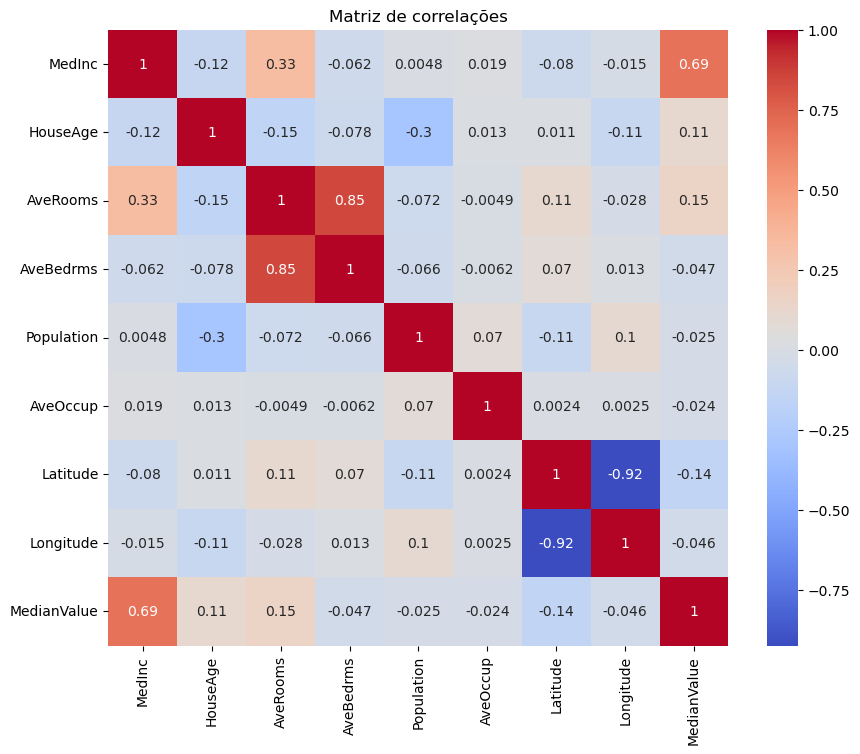

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
sns.heatmap(casas_df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Matriz de correlações')

In [20]:
atributos_selecionados = ['MedInc', 'AveRooms', 'HouseAge']

X = casas_df[atributos_selecionados]
Y = casas_df['MedianValue']

print(X)

       MedInc  AveRooms  HouseAge
0      8.3252  6.984127      41.0
1      8.3014  6.238137      21.0
2      7.2574  8.288136      52.0
3      5.6431  5.817352      52.0
4      3.8462  6.281853      52.0
...       ...       ...       ...
20635  1.5603  5.045455      25.0
20636  2.5568  6.114035      18.0
20637  1.7000  5.205543      17.0
20638  1.8672  5.329513      18.0
20639  2.3886  5.254717      16.0

[20640 rows x 3 columns]


In [22]:
# Padronização dos dados para resolver problemas de escala 

from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()

X_padronizado = padronizador.fit_transform(X)

print(X_padronizado)

[[ 2.34476576  0.62855945  0.98214266]
 [ 2.33223796  0.32704136 -0.60701891]
 [ 1.7826994   1.15562047  1.85618152]
 ...
 [-1.14259331 -0.09031802 -0.92485123]
 [-1.05458292 -0.04021111 -0.84539315]
 [-0.78012947 -0.07044252 -1.00430931]]


In [28]:
# Regressão Linear Múltipla

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# Separação dos dados em treino e teste

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_padronizado, Y, test_size = 0.2, random_state = 42)

# Inicialização e ajuste do modelo

modelo = LinearRegression()
modelo.fit(X_treino, Y_treino)

# Predições na amostra teste

y_pred = modelo.predict(X_teste)

print("Erro médio percentual absoluto (MAPE):{:.4f}".format(mean_absolute_percentage_error(Y_teste, y_pred)))
print("R²:{:.4f}".format(r2_score(Y_teste, y_pred)))


Erro médio percentual absoluto (MAPE):0.3771
R²:0.4972
